### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve

warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")
# For reproducibility
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)


In [41]:
# Load the dataset
#url = 'data/sentiment.zip'
#data = pd.read_csv(url, compression='zip', sep='\t', header=None, names=['sentence', 'label'])
url = 'data/amazon_cells_labelled.txt'
data = pd.read_csv(url, sep='\t', header=None, names=['sentence', 'label'])

# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
            label
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000
                                            sentence  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


In [8]:
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['sentence']).toarray()
y = data['label']


In [16]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best score
best_score = grid_search.best_score_
print(f"Best F1-score: {best_score}")


Best parameters: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'distance'}
Best F1-score: 0.7605960510389191


In [32]:
# Predict on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score on test data: {f1}")


              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81        93
    Positive       0.83      0.83      0.83       107

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

[[75 18]
 [18 89]]
F1-score on test data: 0.8317757009345794


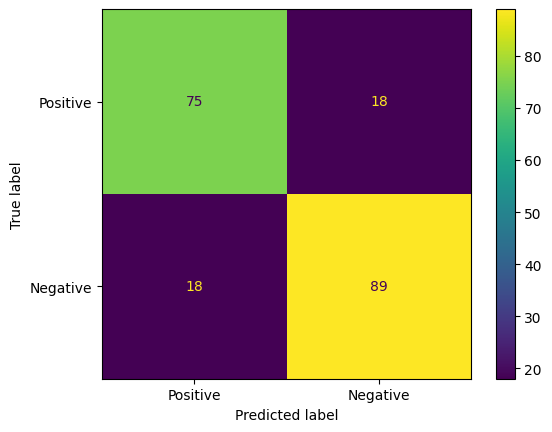

<Figure size 640x480 with 0 Axes>

In [33]:

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Positive', 'Negative' ])
disp.plot()
plt.show()
plt.savefig('images/confusion_matrix.jpg')

In [34]:
#Step 5: Evaluate the Model and Draw the Precision-Recall Curve

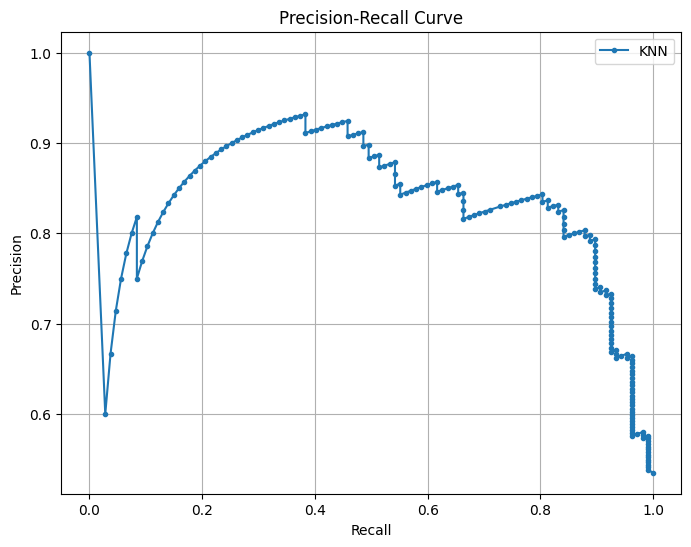

<Figure size 640x480 with 0 Axes>

In [39]:
# Predict on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

plt.savefig('images/PRC.png')